<a href="https://colab.research.google.com/github/CamilaVillarreal/Comision-252613-TPI-Data-Analytics-Final/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comisión 252613 - TPI Data Analytics
Nombre y apellido: Camila Villarreal

# Etapa 1

## Script básico
Actividades 2 y 3

In [2]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'Zapatillas', 'precio': 160000.0, 'cantidad': 5},
  {'producto': 'Camisas', 'precio': 70000.0, 'cantidad': 12},
  {'producto': 'Medias', 'precio': 25000.0, 'cantidad': 10}
]

In [3]:
# Calculamos las ventas acumuladas - map
ventas_acumulada = sum(map(lambda x: x['cantidad'], ventas))
print(ventas_acumulada)


27


In [4]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum([venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

1890000.0

## Import Datasets
Actividad 1

In [5]:
import pandas as pd

In [6]:
# Import dataset ventas
df_ventas = pd.read_csv("https://raw.githubusercontent.com/CamilaVillarreal/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/ventas.csv")

In [7]:
# Import dataset clientes
df_clientes = pd.read_csv("https://raw.githubusercontent.com/CamilaVillarreal/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/clientes.csv")

In [8]:
# Import dataset marketing
df_marketing = pd.read_csv("https://raw.githubusercontent.com/CamilaVillarreal/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/marketing.csv")


### Análisis exploratorio de **datos**
Actividad 4

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [9]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [10]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
#df_ventas.tail()
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [11]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
403,1623,Microondas,$95.91,4.0,17/02/2024,Electrodomésticos
1003,1307,Horno eléctrico,$85.42,11.0,21/04/2024,Electrodomésticos
1205,2022,Televisor,$112.05,3.0,13/05/2024,Electrónica
887,2486,Laptop,$124.95,11.0,08/04/2024,Electrónica
525,868,Rincón de plantas,$85.49,2.0,02/03/2024,Decoración


In [12]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].describe()



,cantidad
count,3033.000000
mean,6.496538
std,3.457250
min,1.000000
25%,3.000000
50%,7.000000
75%,9.000000
max,12.000000


In [13]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"]



,fecha_venta
0,02/01/2024
1,02/01/2024
2,02/01/2024
3,02/01/2024
4,02/01/2024
...,...
3030,30/12/2024
3031,30/12/2024
3032,30/12/2024
3033,30/12/2024


In [14]:
# Analizamos el campo categoria
# Probar con value_counts y unique

#df_ventas["categoria"].unique()
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


### Calidad de datos
Actividad 5

In [15]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [16]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="producto")

,id_venta,producto,precio,cantidad,fecha_venta,categoria
845,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
833,300,Adorno de pared,$67.75,9.0,06/04/2024,Decoración
857,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
868,345,Alfombra,$56.78,9.0,07/04/2024,Decoración
...,...,...,...,...,...,...
854,2108,SmartWatch,$79.37,10.0,06/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
825,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica
877,2373,Smartphone,$123.60,12.0,07/04/2024,Electrónica


In [17]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [18]:
# Visualizar los nulos
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [19]:
# Analizar los precios de los NaN a ver que opciones tenemos
df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
#df_ventas["producto"].value_counts()



,id_venta,producto,precio,cantidad,fecha_venta,categoria
36,17,Elementos de cerámica,$108.48,11.0,07/01/2024,Decoración
51,687,Elementos de cerámica,$27.68,8.0,08/01/2024,Decoración
71,817,Elementos de cerámica,$106.31,1.0,10/01/2024,Decoración
95,507,Elementos de cerámica,$111.10,1.0,13/01/2024,Decoración
97,987,Elementos de cerámica,$102.62,3.0,13/01/2024,Decoración
...,...,...,...,...,...,...
2892,427,Elementos de cerámica,$60.13,6.0,14/12/2024,Decoración
2904,567,Elementos de cerámica,$97.22,8.0,15/12/2024,Decoración
2961,917,Elementos de cerámica,$52.65,8.0,22/12/2024,Decoración
2972,497,Elementos de cerámica,$124.16,4.0,23/12/2024,Decoración


### Observaciones




* Cantidad de registros: 3035
* Columnas 6
* 35 duplicados, eliminarlos
* Algunos nulos (2), 1% del faltante, dropna
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype


## Dataframe marketing

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [20]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [21]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_marketing.head()

df_marketing.tail()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
85,70,Aspiradora,TV,3.06,13/12/2024,29/12/2024
86,89,Televisor,TV,4.98,13/12/2024,8/2/2025
87,68,Rincón de plantas,TV,5.81,17/12/2024,14/2/2025
88,33,Secadora,Email,3.80,20/12/2024,7/1/2025
89,11,Freidora eléctrica,RRSS,5.27,29/12/2024,21/1/2025


In [22]:
# Analizamos el campo costo
df_marketing["costo"].sample()

,costo
78,5.3


In [23]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
64,25/09/2024
50,15/08/2024
53,19/08/2024
59,09/09/2024
15,12/05/2024


In [24]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
17,12/07/2024
52,19/09/2024
11,17/06/2024
68,16/11/2024
18,02/07/2024


### Calidad de los datos


In [25]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()


np.int64(0)

In [26]:
# Buscamos registros Null

df_marketing.isnull().sum()


,0
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


In [27]:
#Amalises de medio de venta
df_marketing["canal"].value_counts()


,count
canal,
TV,30
RRSS,30
Email,30


### Observaciones
* Cantidad de registros: 90
* Columnas 6
* 0 registros duplicados
* 0 registros Null

## Dataframe clientes

### Analisis exploratorio de datos

In [28]:
#Análisis general del DataFrame
df_clientes.info()
#df_clientes.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [29]:
#Ver la cantidad de ciudades únicas
#df_clientes["ciudad"].nunique()
df_clientes["ciudad"].value_counts()


,count
ciudad,
Mar del Plata,63
Rosario,55
Posadas,52
Resistencia,50
Córdoba,49
Corrientes,47
Santa Fe,46
Bahía Blanca,44
Salta,43


In [30]:
#calcular el promedio de edades
df_clientes["edad"].mean()

np.float64(37.94003527336861)

In [31]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

In [32]:
# Buscamos registros Null
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


### Observaciones
* Cantidad de registros: 567
* Columnas 5
* 0 registros duplicados
* 0 registros Null
* El promedio de edad es 37

# Etapa 2

## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Dataframe ventas

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [33]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [34]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [35]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [36]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [37]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [38]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
1048,64.17
2359,112.79
376,63.33


In [39]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)

In [40]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [41]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes

dtype('int64')

In [42]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [43]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype

dtype('<M8[ns]')

### Dataframe marketing

* Transformacion de fecha tipo Texton a datetime

In [44]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], dayfirst=True)


In [45]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], dayfirst=True)

In [46]:
# Validamos los cambios
df_marketing.info()
df_marketing[['fecha_inicio','fecha_fin']].sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


,fecha_inicio,fecha_fin
62,2024-09-24,2024-11-02
1,2024-03-26,2024-05-13
4,2024-03-31,2024-05-05
55,2024-08-26,2024-10-07
39,2024-07-17,2024-08-01


## Transformación de datos
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [47]:
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos


In [48]:
# Transformación:
# Calculamos el valor de cada venta = precio * cantidad
# Agregamos una nueva columnas
df_ventas["valor_venta"] = df_ventas["precio"] * df_ventas["cantidad"]


In [49]:
# Visualizamos
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [50]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = df_ventas.groupby("producto", as_index=False)["valor_venta"].sum()

In [51]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


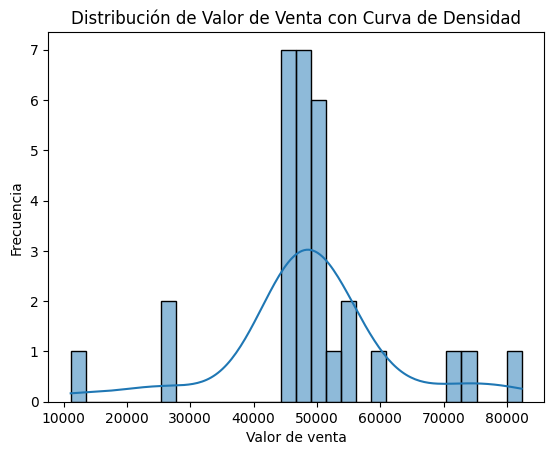

In [52]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

In [53]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [54]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]


## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [55]:
df_ventas.columns

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [56]:
# Agrupamos por categoria y agregamos la suma
ventas_categoria = df_ventas.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [57]:
ventas_categoria

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [58]:
# Ordenar y mostrar los resultados
ventas_categoria

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [59]:
df_ventas.head(2)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [60]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [61]:
# Unir los datasets ventas y marketing por columna 'producto'
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")

In [62]:
# Verificar coincidencias (muestra)
ventas_marketing.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,2,RRSS,5.88,2024-05-30,2024-06-29


### Analizamos el impacto de la campaña

In [63]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
# Seleccionamos solo los campos que nos interesan: "producto", "valor_venta", "costo"
ventas_durante_campaña = ['producto', 'valor_venta', 'costo']


In [64]:

# Agrupamos por producto y hacemos una agregación por "valor de venta" y "costo"
ventas_marketing.groupby("categoria")[["valor_venta","costo"]].sum()

,valor_venta,costo
categoria,,
Decoración,1437648.27,15774.86
Electrodomésticos,1515898.89,14644.65
Electrónica,1447733.40,14243.90


In [65]:
# Generamos una nueva columna con la diferencia entre lo vendido y lo invertido en la campaña
df_ventas["diferencia"] = df_ventas["valor_venta"] - df_ventas["precio"]

In [66]:
# Verificar nueva columna con la diferencia
df_ventas.head()



,id_venta,producto,precio,cantidad,fecha_venta,categoria,valor_venta,diferencia
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70,279.76
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50,420.40
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,195.92
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80,800.45
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84,318.63


### Unimos los dataframes ventas con marketing

In [67]:
# Hacemos el merge entre marketing y ventas por columna producto
ventas_marketing = pd.merge(df_ventas, df_marketing, on="producto", how="left")
print("Cantidad de registros: ", len(ventas_marketing))

Cantidad de registros:  8994


In [68]:
# Visualizemos algunos registros luego del merge (ordenados por producto, id_venta)
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
4602,10,Adorno de pared,446.50,TV,4.81,2024-06-29,2024-03-20,2024-05-03
4603,10,Adorno de pared,446.50,Email,5.08,2024-06-29,2024-04-13,2024-05-10
4604,10,Adorno de pared,446.50,RRSS,4.16,2024-06-29,2024-10-22,2024-12-21
303,20,Adorno de pared,180.42,TV,4.81,2024-01-14,2024-03-20,2024-05-03
304,20,Adorno de pared,180.42,Email,5.08,2024-01-14,2024-04-13,2024-05-10
305,20,Adorno de pared,180.42,RRSS,4.16,2024-01-14,2024-10-22,2024-12-21


In [69]:
# Visualizamos algunos registros, pero ordenamos por fecha_venta
ventas_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["valor_venta"], ascending=False).head(6)

,id_venta,producto,valor_venta,canal,costo,fecha_venta,fecha_inicio,fecha_fin
1646,2063,Smartphone,1488.12,TV,4.78,2024-03-05,2024-09-28,2024-10-24
1644,2063,Smartphone,1488.12,RRSS,6.37,2024-03-05,2024-03-29,2024-05-16
1645,2063,Smartphone,1488.12,Email,4.65,2024-03-05,2024-05-28,2024-06-15
2625,1109,Batidora,1485.96,Email,4.48,2024-04-11,2024-04-10,2024-06-08
2627,1109,Batidora,1485.96,RRSS,4.52,2024-04-11,2024-11-01,2024-12-08
2626,1109,Batidora,1485.96,TV,6.28,2024-04-11,2024-08-27,2024-10-11


Luego del merge encontramos:

* Aparecen ventas duplicadas, por ejemplo los primeros 3 registros con id_venta 2063, dado que ese producto tuvo 3 campañas de marketing, pero para este caso fue vendido fuera del período de marketing.
* Y ver el caso de los últimos 3 registros con id_venta 1109, dos de ellos dentro y uno fuera del período


Se generar dos nuevos dataframes, uno con aquellas ventas dentro del período de marketing, y otro fuera del período

### Ventas dentro de la campaña

In [70]:
# filtramos solo aquellos productos que se hayan vendido dentro de la campaña de marketing
ventas_con_marketing = ventas_marketing.query("fecha_venta >= fecha_inicio & fecha_venta <= fecha_fin")
print("Cantidad de registros dentro de la campaña: ", len(ventas_con_marketing))

Cantidad de registros dentro de la campaña:  847


In [ ]:
# Visualicemos algunos de los registros de ventas durante la campaña de marketing
ventas_con_marketing[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)

In [ ]:
# Como vemos algunos duplicados, listemos solo esos
ventas_con_marketing_duplicados = ventas_con_marketing[ventas_con_marketing.duplicated(subset="id_venta",keep=False)]
ventas_con_marketing_duplicados[["id_venta","producto", "valor_venta", "canal", "costo", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)


Se grupa directamente por producto, debemos antes agrupar por [id_venta, producto] quedarnos con el primer valor_venta y hacer la suma de los costos de marketing.
<BR>
Luego si agrupamos por producto, para saber el monto total de venta para cada uno.

In [ ]:
# Entonces grupamos primero por id_venta y producto
# de esa particion, nos quedamos con la primera venta y la suma de los costos de marketing
ventas_con_marketing_agg1 = ventas_con_marketing.groupby(["id_venta","producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first"),
    costo_agg=("costo", "sum")
)

print("Cantidad de registros con id_venta únicos: ", len(ventas_con_marketing_agg1))

In [ ]:
# Verificamos la consistencia de los montos, ventas y costos de marketing
ventas_con_marketing_agg1[["id_venta","producto", "valor_venta", "costo_agg"]].sort_values(by=["producto", "id_venta"], ascending=True).head(6)


In [ ]:
# En la segunda agregacion, agrupamos solo por producto,
ventas_con_marketing_agg2 = ventas_con_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_cm=("valor_venta", "sum"),
    costo_marketing=("costo_agg", "sum")
)

# Agregamos otra columna con la ganancia
ventas_con_marketing_agg2["ganacia_producto_cm"]= ventas_con_marketing_agg2["ventas_producto_cm"]-ventas_con_marketing_agg2["costo_marketing"]

# Finalmente, ordenamos y guardamos en el dataframe final
ventas_con_marketing_final = ventas_con_marketing_agg2.sort_values(by=["ganacia_producto_cm"], ascending=False)

In [ ]:
# Dataframe resultante
ventas_con_marketing_final.head(5)

### Ventas fuera de la campaña de marketing

In [ ]:
# filtramos solo aquellos productos que se hayan vendido fuera de la campaña
ventas_sin_marketing = ventas_marketing.query("(fecha_venta < fecha_inicio) | (fecha_venta > fecha_fin)")
print("Cantidad de registros fuera de la campaña: ", len(ventas_sin_marketing))

In [ ]:
ventas_sin_marketing[["id_venta","producto", "valor_venta", "fecha_venta", "fecha_inicio","fecha_fin"]].sort_values(by=["id_venta","producto"], ascending=True).head(6)

In [ ]:
# Aquí también hay id_venta duplicados, así que procedemos igual que antes, agrupando primero por id_venta y producto
# y luego solo por producto
ventas_sin_marketing_agg1 = ventas_sin_marketing.groupby(["id_venta", "producto"], as_index=False).agg(
    valor_venta=("valor_venta", "first")
)
print(len(ventas_sin_marketing_agg1))

ventas_sin_marketing_agg2 = ventas_sin_marketing_agg1.groupby(["producto"], as_index=False).agg(
    ventas_producto_sm=("valor_venta", "sum")
)

# Ordenamos y guardamos en el dataframe final
ventas_sin_marketing_final = ventas_sin_marketing_agg2[["producto", "ventas_producto_sm"]].sort_values(by=["ventas_producto_sm"], ascending=False)

In [ ]:
ventas_sin_marketing_final.head(5)

### Grafico ventas y costos de marketing apilado


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto

# Estilos
sns.set_theme(
    style="whitegrid",
    palette="Set3",
    context="notebook")
plt.figure(figsize=(10,6))

# Primer nivel (abajo)
plt.bar(ventas_con_marketing_final["producto"], ventas_con_marketing_final["ventas_producto_cm"], label="Ventas")

# Segundo nivel (arriba)
plt.bar(ventas_con_marketing_final["producto"], ventas_con_marketing_final["costo_marketing"],
        bottom=ventas_con_marketing_final["ventas_producto_cm"],
        label="Costo Marketing")


plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.show()